In [51]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns
%matplotlib inline

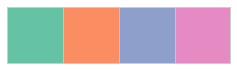

In [52]:
sns.set_context('paper', font_scale=1.7)
sns.set_style('whitegrid')
#mpl.rc('font', **{'family':'serif', 'serif':['Computer Modern Roman'],
#                                'monospace': ['Computer Modern Typewriter']})
params = {'backend': 'pdf',
          #'axes.labelsize': 8,
          'font.size': 10,
          'legend.fontsize': 8,
          #'xtick.labelsize': 8,
          #'ytick.labelsize': 8,
#          'text.usetex': True,
          #'figure.figsize': fig_size,
          'axes.unicode_minus': True,
          'image.cmap': 'plasma'}
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
mpl.rcParams.update(params)
sns.set_palette(sns.color_palette("Set2", 4))
sns.palplot(sns.color_palette("Set2", 4))

# Setup

In [53]:
architectures = ["kebnekaise", "knl_ram"]

# Weak scaling results

In [54]:
def weak_scale_plot(data, prog, arch):
    fig = plt.figure()
    width = 3.487
    height = width/1.618
    LW = 1.5
    nrange = np.sort(data.n.unique())
    plt.plot(nrange, data[data.library=="lapack"].gflops, label="$\mathrm{LAPACK}$", linewidth=LW)
    plt.plot(nrange, data[data.library=="vendor"].gflops, label="$\mathrm{MKL}$", linewidth=LW)
    #plt.plot(nrange, data[data.library=="plasma_2_8_0"].gflops, label="$\mathrm{Quark}$", linewidth=LW)
    plt.plot(nrange, data[data.library=="plasma_17"].gflops, label="$\mathrm{PLASMA (OpenMP)}$", linewidth=LW)
    if not (prog == "zgetrf" or prog == "zhetrf" or
        prog == "dgetrf" or prog == "dsytrf" or
        prog == "cgetrf" or prog == "chetrf" or
        prog == "sgetrf" or prog == "ssytrf"):
        # Can use StarPU
        plt.plot(nrange, data[(data.library=="plasma_kstar") & (data.starpu_sched=="eager")].gflops, label="$\mathrm{PLASMA(StarPU)}$", linewidth=LW)
        #plt.plot(nrange, data[(data.library=="plasma_kstar") & (data.starpu_sched=="dmda")].gflops, label="$\mathrm{StarPU\_dmda}$", linewidth=LW)
        #plt.plot(nrange, data[(data.library=="plasma_kstar") & (data.starpu_sched=="ws")].gflops, label="$\mathrm{StarPU\_ws}$", linewidth=LW)
    plt.ylabel(r'$\mathrm{GFlop/s}$')
    plt.xlabel(r'$n$')
    plt.legend(loc='best')
    if arch == "kebnekaise":
        hw = "broadwell"
        cores = "28"
    else:
        hw = "knl"
        cores = "68"
    plt.title(r'$\mathrm{'+prog+r'.'+hw+' ('+cores+'\ cores)'+r'}$', fontsize=12)
    fig.set_size_inches(width, height)
    plt.savefig('../fig-lapack/'+arch+'_'+prog+'_weak_scaling.eps', bbox_inches='tight')

kebnekaise
zhetrf
kebnekaise
zpotrf
kebnekaise
zgetrf
kebnekaise
zgeqrf
kebnekaise
chetrf
kebnekaise
cpotrf
kebnekaise
cgetrf
kebnekaise
cgeqrf
kebnekaise
dsytrf
kebnekaise
dpotrf
kebnekaise
dgetrf
kebnekaise
dgeqrf
kebnekaise
ssytrf
kebnekaise
spotrf
kebnekaise
sgetrf
kebnekaise
sgeqrf
knl_ram
zhetrf
knl_ram
zpotrf
knl_ram
zgetrf
knl_ram
zgeqrf
knl_ram
chetrf
knl_ram
cpotrf
knl_ram
cgetrf
knl_ram
cgeqrf
knl_ram
dsytrf
knl_ram
dpotrf
knl_ram
dgetrf
knl_ram
dgeqrf
knl_ram
ssytrf
knl_ram
spotrf
knl_ram
sgetrf
knl_ram
sgeqrf


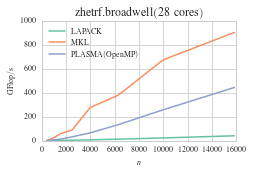

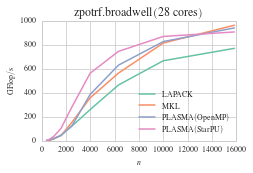

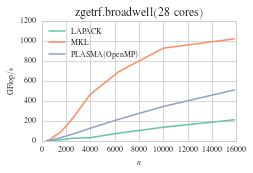

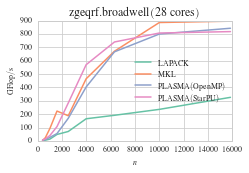

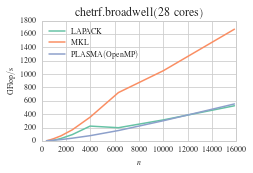

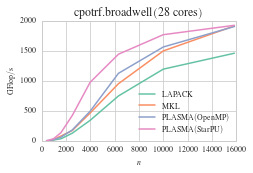

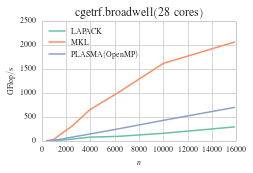

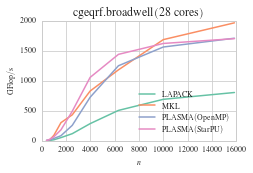

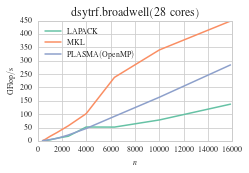

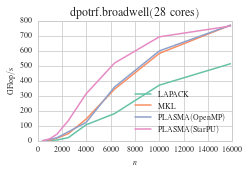

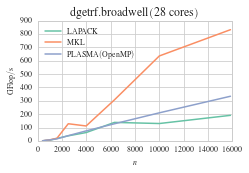

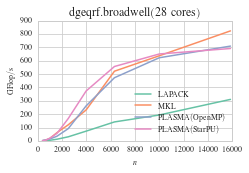

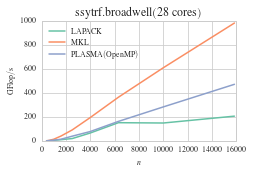

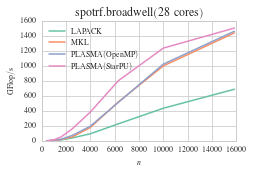

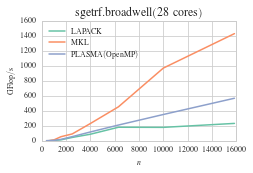

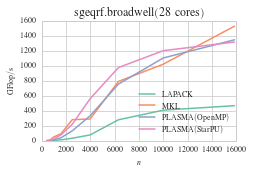

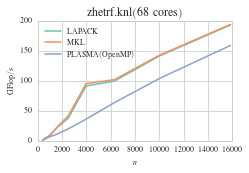

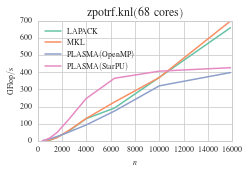

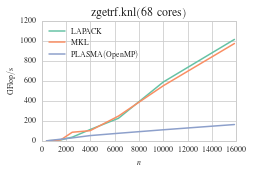

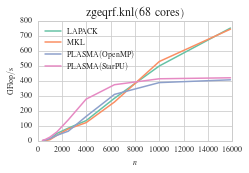

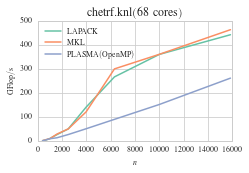

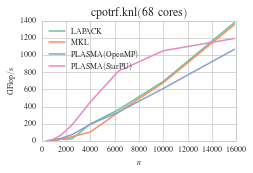

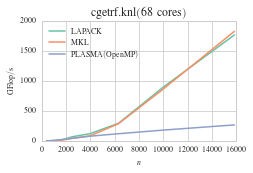

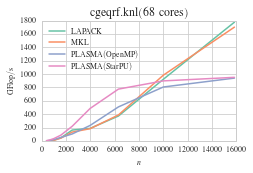

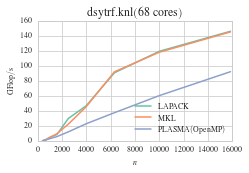

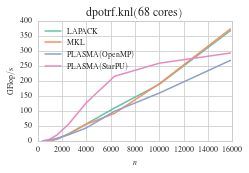

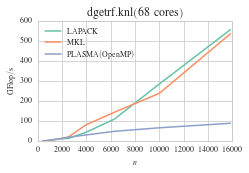

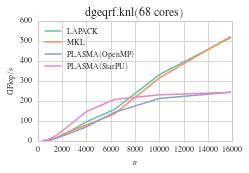

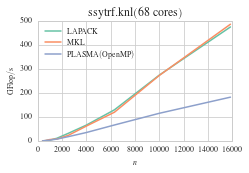

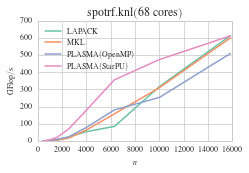

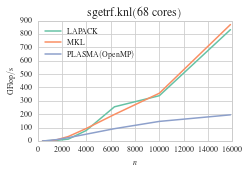

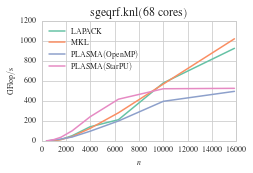

In [55]:
for arch in architectures:
    data = pd.read_csv(arch + '_weak_scaling.csv')
    for routine in data.routine.unique():
        print(arch)
        print(routine)
        curdata = data[data.routine == routine]
        weak_scale_plot(curdata, routine, arch)